https://blog.amedama.jp/entry/2018/05/01/081842

In [1]:
import lightgbm as lgb

from sklearn import datasets
from sklearn.model_selection import train_test_split

import numpy as np

# LightGBM を使った多値分類のサンプルコード

In [2]:
def main():
    # Iris データセットを読み込む
    iris = datasets.load_iris()
    X, y = iris.data, iris.target

    # 訓練データとテストデータに分割する
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # データセットを生成する
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # LightGBM のハイパーパラメータ
    lgbm_params = {
        # 多値分類問題
        'objective': 'multiclass',
        # クラス数は 3
        'num_class': 3,
    }

    # 上記のパラメータでモデルを学習する
    model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)

    # テストデータを予測する
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    y_pred_max = np.argmax(y_pred, axis=1)  # 最尤と判断したクラスの値にする

    # 精度 (Accuracy) を計算する
    accuracy = sum(y_test == y_pred_max) / len(y_test)
    print(accuracy)

In [3]:
main()

[1]	valid_0's multi_logloss: 0.983911
[2]	valid_0's multi_logloss: 0.889648
[3]	valid_0's multi_logloss: 0.809677
[4]	valid_0's multi_logloss: 0.742211
[5]	valid_0's multi_logloss: 0.681261
[6]	valid_0's multi_logloss: 0.629707
[7]	valid_0's multi_logloss: 0.583233
[8]	valid_0's multi_logloss: 0.54067
[9]	valid_0's multi_logloss: 0.502778
[10]	valid_0's multi_logloss: 0.472518
[11]	valid_0's multi_logloss: 0.442552
[12]	valid_0's multi_logloss: 0.414305
[13]	valid_0's multi_logloss: 0.39069
[14]	valid_0's multi_logloss: 0.370619
[15]	valid_0's multi_logloss: 0.35128
[16]	valid_0's multi_logloss: 0.332932
[17]	valid_0's multi_logloss: 0.318822
[18]	valid_0's multi_logloss: 0.305039
[19]	valid_0's multi_logloss: 0.292437
[20]	valid_0's multi_logloss: 0.282467
[21]	valid_0's multi_logloss: 0.271439
[22]	valid_0's multi_logloss: 0.263129
[23]	valid_0's multi_logloss: 0.254066
[24]	valid_0's multi_logloss: 0.247447
[25]	valid_0's multi_logloss: 0.238404
[26]	valid_0's multi_logloss: 0.23303

## 交差検証 (Cross Validation)

In [6]:
import lightgbm as lgb
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

def main():
    # Iris データセットを読み込む
    iris = datasets.load_iris()
    X, y = iris.data, iris.target

    # データセットを生成する
    lgb_train = lgb.Dataset(X, y)

    # LightGBM のハイパーパラメータ
    lgbm_params = {
        # 多値分類問題
        'objective': 'multiclass',
        # クラス数は 3
        'num_class': 3,
    }

    # 上記のパラメータでモデルを学習〜交差検証までする
    cv_results = lgb.cv(lgbm_params, lgb_train, nfold=10)
    cv_logloss = cv_results['multi_logloss-mean']
    round_n = np.arange(len(cv_logloss))

    plt.xlabel('round')
    plt.ylabel('logloss')
    plt.plot(round_n, cv_logloss)
    plt.show()

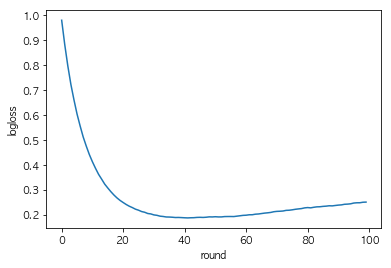

In [7]:
main()

## 最適なブーストラウンド数を自動で決める

In [8]:
import lightgbm as lgb

import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def main():
    # Iris データセットを読み込む
    iris = datasets.load_iris()
    X, y = iris.data, iris.target

    # データセットを学習用とテスト用に分割する
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    # テスト用のデータを評価用と検証用に分ける
    X_eval, X_valid, y_eval, y_valid = train_test_split(X_test, y_test, random_state=42)

    # データセットを生成する
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_eval, y_eval, reference=lgb_train)

    # LightGBM のハイパーパラメータ
    lgbm_params = {
        # 多値分類問題
        'objective': 'multiclass',
        # クラス数は 3
        'num_class': 3,
    }

    # 上記のパラメータでモデルを学習する
    model = lgb.train(lgbm_params, lgb_train,
                      # モデルの評価用データを渡す
                      valid_sets=lgb_eval,
                      # 最大で 1000 ラウンドまで学習する
                      num_boost_round=1000,
                      # 10 ラウンド経過しても性能が向上しないときは学習を打ち切る
                      early_stopping_rounds=10)

    # 学習したモデルでホールドアウト検証する
    y_pred_proba = model.predict(X_valid, num_iteration=model.best_iteration)
    # 返り値は確率になっているので最尤に寄せる
    y_pred = np.argmax(y_pred_proba, axis=1)

    # 精度 (Accuracy) を計算する
    accuracy = accuracy_score(y_valid, y_pred)
    print(accuracy)


In [9]:
main()

[1]	valid_0's multi_logloss: 0.965411
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's multi_logloss: 0.853511
[3]	valid_0's multi_logloss: 0.758325
[4]	valid_0's multi_logloss: 0.677698
[5]	valid_0's multi_logloss: 0.60634
[6]	valid_0's multi_logloss: 0.546205
[7]	valid_0's multi_logloss: 0.493927
[8]	valid_0's multi_logloss: 0.447416
[9]	valid_0's multi_logloss: 0.404347
[10]	valid_0's multi_logloss: 0.367686
[11]	valid_0's multi_logloss: 0.33566
[12]	valid_0's multi_logloss: 0.306818
[13]	valid_0's multi_logloss: 0.281015
[14]	valid_0's multi_logloss: 0.256197
[15]	valid_0's multi_logloss: 0.236223
[16]	valid_0's multi_logloss: 0.217242
[17]	valid_0's multi_logloss: 0.201455
[18]	valid_0's multi_logloss: 0.18592
[19]	valid_0's multi_logloss: 0.171645
[20]	valid_0's multi_logloss: 0.159509
[21]	valid_0's multi_logloss: 0.147981
[22]	valid_0's multi_logloss: 0.140308
[23]	valid_0's multi_logloss: 0.130644
[24]	valid_0's multi_logloss: 0.121649
[25]	valid_0's

# 回帰問題 (Boston データセット)

In [10]:
import lightgbm as lgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np

def main():
    # Boston データセットを読み込む
    boston = datasets.load_boston()
    X, y = boston.data, boston.target

    # 訓練データとテストデータに分割する
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # データセットを生成する
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # LightGBM のハイパーパラメータ
    lgbm_params = {
        # 回帰問題
        'objective': 'regression',
        # RMSE (平均二乗誤差平方根) の最小化を目指す
        'metric': 'rmse',
    }

    # 上記のパラメータでモデルを学習する
    model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)

    # テストデータを予測する
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    # RMSE を計算する
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

In [11]:
main()

[1]	valid_0's rmse: 8.20848
[2]	valid_0's rmse: 7.61135
[3]	valid_0's rmse: 7.05165
[4]	valid_0's rmse: 6.51547
[5]	valid_0's rmse: 6.10095
[6]	valid_0's rmse: 5.70786
[7]	valid_0's rmse: 5.3716
[8]	valid_0's rmse: 5.17301
[9]	valid_0's rmse: 4.92248
[10]	valid_0's rmse: 4.75289
[11]	valid_0's rmse: 4.58754
[12]	valid_0's rmse: 4.45432
[13]	valid_0's rmse: 4.33968
[14]	valid_0's rmse: 4.23888
[15]	valid_0's rmse: 4.17374
[16]	valid_0's rmse: 4.11627
[17]	valid_0's rmse: 4.06162
[18]	valid_0's rmse: 4.02712
[19]	valid_0's rmse: 3.99031
[20]	valid_0's rmse: 3.98485
[21]	valid_0's rmse: 3.96623
[22]	valid_0's rmse: 3.95181
[23]	valid_0's rmse: 3.93701
[24]	valid_0's rmse: 3.93193
[25]	valid_0's rmse: 3.9314
[26]	valid_0's rmse: 3.93025
[27]	valid_0's rmse: 3.92987
[28]	valid_0's rmse: 3.92994
[29]	valid_0's rmse: 3.93597
[30]	valid_0's rmse: 3.94455
[31]	valid_0's rmse: 3.94609
[32]	valid_0's rmse: 3.93127
[33]	valid_0's rmse: 3.91826
[34]	valid_0's rmse: 3.91697
[35]	valid_0's rmse: 3.92

## 最適なブーストラウンド数を自動で決める

In [12]:
import lightgbm as lgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np

def main():
    
    # Boston データセットを読み込む
    boston = datasets.load_boston()
    X, y = boston.data, boston.target

    # データセットを学習用とテスト用に分割する
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    # テスト用のデータを評価用と検証用に分ける
    X_eval, X_valid, y_eval, y_valid = train_test_split(X_test, y_test, random_state=42)
    
    # データセットを生成する
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # LightGBM のハイパーパラメータ
    lgbm_params = {
        # 回帰問題
        'objective': 'regression',
        # RMSE (平均二乗誤差平方根) の最小化を目指す
        'metric': 'rmse',
    }
    
    # 上記のパラメータでモデルを学習する
    model = lgb.train(lgbm_params, lgb_train,
                      # モデルの評価用データを渡す
                      valid_sets=lgb_eval,
                      # 最大で 1000 ラウンドまで学習する
                      num_boost_round=1000,
                      # 10 ラウンド経過しても性能が向上しないときは学習を打ち切る
                      early_stopping_rounds=10)

    # テストデータを予測する
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    # RMSE を計算する
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

In [13]:
main()

[1]	valid_0's rmse: 7.88837
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 7.3166
[3]	valid_0's rmse: 6.83052
[4]	valid_0's rmse: 6.40996
[5]	valid_0's rmse: 6.02745
[6]	valid_0's rmse: 5.70736
[7]	valid_0's rmse: 5.4342
[8]	valid_0's rmse: 5.24044
[9]	valid_0's rmse: 5.04377
[10]	valid_0's rmse: 4.85639
[11]	valid_0's rmse: 4.7127
[12]	valid_0's rmse: 4.59074
[13]	valid_0's rmse: 4.49256
[14]	valid_0's rmse: 4.36894
[15]	valid_0's rmse: 4.28391
[16]	valid_0's rmse: 4.18932
[17]	valid_0's rmse: 4.10822
[18]	valid_0's rmse: 4.04982
[19]	valid_0's rmse: 3.99233
[20]	valid_0's rmse: 3.9352
[21]	valid_0's rmse: 3.89598
[22]	valid_0's rmse: 3.85966
[23]	valid_0's rmse: 3.83084
[24]	valid_0's rmse: 3.79969
[25]	valid_0's rmse: 3.76133
[26]	valid_0's rmse: 3.73787
[27]	valid_0's rmse: 3.71347
[28]	valid_0's rmse: 3.69201
[29]	valid_0's rmse: 3.68031
[30]	valid_0's rmse: 3.66503
[31]	valid_0's rmse: 3.66207
[32]	valid_0's rmse: 3.65243
[33]	valid_0's rmse: 3.